
# Conducting basic EDA of NY Zillow

## Assessing extra features that may be significant in predicting price

- Model Ideas
    - Time Series
    - Linear Regression
    - Logistic Regression
    - Decision Tree Classifier

In [2]:
# Import packages
import pandas as pd

In [3]:
df = pd.read_csv('NY-nyzillow.csv')
df

,latitude,longitude,floorSize,url,price
0,40.753036,-73.96717,879,https://www.zillow.com/homedetails/865-United-...,"$975,000"
1,40.653957,-73.96155,410,https://www.zillow.com/homedetails/353-Ocean-A...,"$399,000"
2,40.741700,-73.99820,550,https://www.zillow.com/homedetails/210-W-19th-...,"$760,000"
3,40.682350,-73.93008,"3,000",https://www.zillow.com/homedetails/418-Macdono...,"$2,100,000"
4,40.770800,-73.95440,"2,300",https://www.zillow.com/homedetails/363-E-76th-...,"$2,999,999"
...,...,...,...,...,...
101,40.652927,-73.95564,772,https://www.zillow.com/homedetails/2107-Bedfor...,"$595,000"
102,40.638950,-73.95507,"1,650",https://www.zillow.com/homedetails/31-Stephens...,"$1,349,000"
103,40.778316,-73.97942,700,https://www.zillow.com/homedetails/126-W-73rd-...,"$648,000"
104,40.682350,-73.93008,"3,000",https://www.zillow.com/homedetails/418-Macdono...,"$2,100,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   106 non-null    float64
 1   longitude  106 non-null    float64
 2   floorSize  106 non-null    object 
 3   url        106 non-null    object 
 4   price      106 non-null    object 
dtypes: float64(2), object(3)
memory usage: 4.3+ KB


Dropping columns that are not needed for analysis

In [5]:
col_drop = ['address/community', 'address/neighborhood', 'address/subdivision', 'currency',
           'description', 'livingArea']

In [6]:
rename_dict = {'address/city': 'city', 'address/state': 'state', 
               'address/streetAddress': 'street_address',
                'address/zipcode': 'zipcode'}


### Inspecting the columns and dropping columns not needed for analysis

Removing all photo columns with regex to eliminate the urls

In [7]:
df3 = pd.read_csv('data/dataset2_ny_nj_2022-03-18_19-12-50-410.csv')
df3 = df3.drop(col_drop, axis='columns')
df3 = df3[df3.columns.drop(list(df3.filter(regex='photos')))] #remove all photo columns
df3.rename(columns=rename_dict, inplace=True)
df3

,city,state,street_address,zipcode,bathrooms,bedrooms,homeStatus,latitude,longitude,price,url,yearBuilt
0,New Rochelle,NY,235 Sussex Rd,10804,3.0,4.0,FOR_SALE,40.946500,-73.779434,995000,https://www.zillow.com/homedetails/235-Sussex-...,1984.0
1,Jamaica,NY,187-20 Wexford Ter,11432,2.0,3.0,FOR_SALE,40.715427,-73.775070,825000,https://www.zillow.com/homedetails/187-20-Wexf...,1925.0
2,Washingtonville,NY,87 Horton Rd,10992,3.0,4.0,FOR_SALE,41.411705,-74.174580,550000,https://www.zillow.com/homedetails/87-Horton-R...,1993.0
3,Huntington,NY,104 Greenlawn Rd,11743,2.0,4.0,FOR_SALE,40.871204,-73.385100,835000,https://www.zillow.com/homedetails/104-Greenla...,1946.0
4,Brooklyn,NY,1075 Barbey St,11207,5.0,4.0,FOR_SALE,40.656666,-73.879190,785000,https://www.zillow.com/homedetails/1075-Barbey...,1960.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3366,Mount Holly,NJ,11 Pier St,8060,2.0,2.0,FOR_SALE,40.008800,-74.743600,540590,https://www.zillow.com/homedetails/11-Pier-St-...,2022.0
3367,Union City,NJ,555 38th St,7087,4.0,4.0,FOR_SALE,40.776115,-74.029076,675000,https://www.zillow.com/homedetails/555-38th-St...,1903.0
3368,Morris Plains,NJ,1 Pondview Rd,7950,3.0,4.0,FOR_SALE,40.856180,-74.471504,630000,https://www.zillow.com/homedetails/1-Pondview-...,1972.0
3369,Barnegat,NJ,17 Samuel Dr,8005,2.0,2.0,FOR_SALE,39.755700,-74.257500,593440,https://www.zillow.com/homedetails/17-Samuel-D...,2022.0


In [8]:
df2 = pd.read_csv('data/dataset_nj_2022-03-19_14-03-33-776.csv')
df2 = df2.drop(col_drop, axis='columns')
df2 = df2[df2.columns.drop(list(df2.filter(regex='photos')))] #remove all photo columns
df2.rename(columns=rename_dict, inplace=True)
df2

,city,state,street_address,zipcode,bathrooms,bedrooms,homeStatus,latitude,longitude,price,url,yearBuilt
0,Union City,NJ,514 27th St,7087,NaN,NaN,FOR_SALE,40.769825,-74.031680,420000,https://www.zillow.com/homedetails/514-27th-St...,NaN
1,Pleasantville,NJ,148 Woodland Ave,8232,1.0,3.0,FOR_SALE,39.398422,-74.521070,157000,https://www.zillow.com/homedetails/148-Woodlan...,1925.0
2,Millville,NJ,210 S Wade Blvd,8332,NaN,NaN,FOR_SALE,39.391945,-75.018660,69900,https://www.zillow.com/homedetails/210-S-Wade-...,NaN
3,Pittstown,NJ,11 Tara Way,8867,4.0,4.0,FOR_SALE,40.601920,-74.937096,825000,https://www.zillow.com/homedetails/11-Tara-Way...,1983.0
4,Sussex,NJ,27 Hudson Ave,7461,2.0,3.0,FOR_SALE,41.218426,-74.624650,299900,https://www.zillow.com/homedetails/27-Hudson-A...,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1471,Mount Holly,NJ,81 Bridge Blvd,8060,3.0,3.0,FOR_SALE,40.008800,-74.743600,398990,https://www.zillow.com/homedetails/81-Bridge-B...,2022.0
1472,Mount Holly,NJ,9 Pier St,8060,2.0,2.0,FOR_SALE,40.008800,-74.743600,452140,https://www.zillow.com/homedetails/9-Pier-St-M...,2022.0
1473,Mount Holly,NJ,19 Pier St,8060,2.0,3.0,FOR_SALE,40.008800,-74.743600,472140,https://www.zillow.com/homedetails/19-Pier-St-...,2022.0
1474,Mount Holly,NJ,11 Pier St,8060,2.0,2.0,FOR_SALE,40.008800,-74.743600,540590,https://www.zillow.com/homedetails/11-Pier-St-...,2022.0


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            3371 non-null   object 
 1   state           3371 non-null   object 
 2   street_address  3371 non-null   object 
 3   zipcode         3371 non-null   int64  
 4   bathrooms       3343 non-null   float64
 5   bedrooms        3083 non-null   float64
 6   homeStatus      3371 non-null   object 
 7   latitude        3363 non-null   float64
 8   longitude       3363 non-null   float64
 9   price           3371 non-null   int64  
 10  url             3371 non-null   object 
 11  yearBuilt       2433 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 316.2+ KB


In [10]:
df3.duplicated().value_counts()

False    3371
dtype: int64

In [11]:
df3.isna().sum()

city                0
state               0
street_address      0
zipcode             0
bathrooms          28
bedrooms          288
homeStatus          0
latitude            8
longitude           8
price               0
url                 0
yearBuilt         938
dtype: int64

In [12]:
df3['state'].value_counts()

NY    1751
NJ    1620
Name: state, dtype: int64

In [13]:
df3['zipcode'].value_counts()

7030     37
8527     23
7306     18
7093     18
7601     17
         ..
14517     1
13207     1
13114     1
10522     1
8349      1
Name: zipcode, Length: 1110, dtype: int64

In [14]:
df3['bathrooms'].value_counts()

2.0     936
1.0     911
3.0     630
0.0     365
4.0     230
5.0      80
2.5      44
1.5      44
6.0      42
7.0      12
8.0      10
3.5      10
9.0       8
4.5       6
10.0      5
3.1       2
12.0      2
2.1       2
25.0      2
16.0      1
11.0      1
Name: bathrooms, dtype: int64

In [15]:
df3.loc[df3['bathrooms'] == 0.0].index

Int64Index([ 387,  484,  580,  611,  620,  624,  629,  740,  994, 1123,
            ...
            3250, 3253, 3254, 3256, 3261, 3267, 3270, 3275, 3280, 3370],
           dtype='int64', length=365)

In [16]:
list(df3.iloc[df3.loc[df3['bathrooms'] == 0.0].index, -2]) #mostly plots of land

['https://www.zillow.com/homedetails/6-Brooklyn-Ave-Spotswood-NJ-08884/325641290_zpid/',
 'https://www.zillow.com/homedetails/414-Arsenal-St-Watertown-NY-13601/30537963_zpid/',
 'https://www.zillow.com/homedetails/0-Smokey-Ave-Schenevus-NY-12155/2075739180_zpid/',
 'https://www.zillow.com/homedetails/481-Butternut-Rd-Unadilla-NY-13849/31640379_zpid/',
 'https://www.zillow.com/homedetails/23810-116th-Rd-Elmont-NY-11003/2065526621_zpid/',
 'https://www.zillow.com/homedetails/53-Ski-Run-Rd-Bloomingburg-NY-12721/2065526620_zpid/',
 'https://www.zillow.com/homedetails/734-Willow-Ave-Niagara-Falls-NY-14305/31440043_zpid/',
 'https://www.zillow.com/homedetails/0-Castle-Mountain-Rd-Stamford-NY-12167/2075383594_zpid/',
 'https://www.zillow.com/homedetails/319-Finley-Ave-Staten-Island-NY-10306/32336244_zpid/',
 'https://www.zillow.com/homedetails/7800-Ventnor-Ave-Margate-City-NJ-08402/2065838794_zpid/',
 'https://www.zillow.com/homedetails/131-S-Main-St-Belmar-NJ-07719/2067872396_zpid/',
 'https

In [17]:
list(df3.iloc[df3.loc[df3['bathrooms'] > 10].index, -2]) #apartment / unit home

['https://www.zillow.com/homedetails/37-67-64th-St-16-Woodside-NY-11377/2075610888_zpid/',
 'https://www.zillow.com/homedetails/22-24-Crockett-Ave-Troy-NY-12180/2070225144_zpid/',
 'https://www.zillow.com/homedetails/240-246-Warren-St-Glens-Falls-NY-12801/2065590732_zpid/',
 'https://www.zillow.com/homedetails/2276-Old-Route-17-Windsor-NY-13865/305254662_zpid/',
 'https://www.zillow.com/homedetails/1095-Rockland-Ave-Staten-Island-NY-10314/122176748_zpid/',
 'https://www.zillow.com/homedetails/1084-Wendell-Ave-Schenectady-NY-12308/2065523245_zpid/']

In [18]:
df3.loc[0]

city                                                   New Rochelle
state                                                            NY
street_address                                        235 Sussex Rd
zipcode                                                       10804
bathrooms                                                       3.0
bedrooms                                                        4.0
homeStatus                                                 FOR_SALE
latitude                                                    40.9465
longitude                                                -73.779434
price                                                        995000
url               https://www.zillow.com/homedetails/235-Sussex-...
yearBuilt                                                    1984.0
Name: 0, dtype: object

In [19]:
df3.iloc[0, -2]

'https://www.zillow.com/homedetails/235-Sussex-Rd-New-Rochelle-NY-10804/32963957_zpid/'

In [20]:
modeldf = df3.copy()

In [21]:
modeldf.drop('url', axis = 1, inplace=True)
modeldf

,city,state,street_address,zipcode,bathrooms,bedrooms,homeStatus,latitude,longitude,price,yearBuilt
0,New Rochelle,NY,235 Sussex Rd,10804,3.0,4.0,FOR_SALE,40.946500,-73.779434,995000,1984.0
1,Jamaica,NY,187-20 Wexford Ter,11432,2.0,3.0,FOR_SALE,40.715427,-73.775070,825000,1925.0
2,Washingtonville,NY,87 Horton Rd,10992,3.0,4.0,FOR_SALE,41.411705,-74.174580,550000,1993.0
3,Huntington,NY,104 Greenlawn Rd,11743,2.0,4.0,FOR_SALE,40.871204,-73.385100,835000,1946.0
4,Brooklyn,NY,1075 Barbey St,11207,5.0,4.0,FOR_SALE,40.656666,-73.879190,785000,1960.0
...,...,...,...,...,...,...,...,...,...,...,...
3366,Mount Holly,NJ,11 Pier St,8060,2.0,2.0,FOR_SALE,40.008800,-74.743600,540590,2022.0
3367,Union City,NJ,555 38th St,7087,4.0,4.0,FOR_SALE,40.776115,-74.029076,675000,1903.0
3368,Morris Plains,NJ,1 Pondview Rd,7950,3.0,4.0,FOR_SALE,40.856180,-74.471504,630000,1972.0
3369,Barnegat,NJ,17 Samuel Dr,8005,2.0,2.0,FOR_SALE,39.755700,-74.257500,593440,2022.0


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<AxesSubplot:xlabel='yearBuilt', ylabel='Count'>

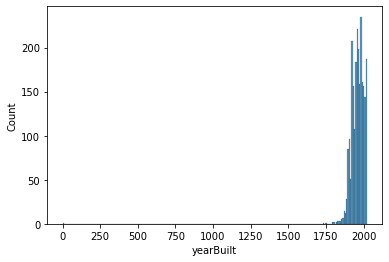

In [23]:
sns.histplot(data = modeldf, x = 'yearBuilt')

In [31]:
modeldf.dropna(inplace=True)
modeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 3370
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            2355 non-null   object 
 1   state           2355 non-null   object 
 2   street_address  2355 non-null   object 
 3   zipcode         2355 non-null   int64  
 4   bathrooms       2355 non-null   float64
 5   bedrooms        2355 non-null   float64
 6   homeStatus      2355 non-null   object 
 7   latitude        2355 non-null   float64
 8   longitude       2355 non-null   float64
 9   price           2355 non-null   int64  
 10  yearBuilt       2355 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 220.8+ KB


In [34]:
yeardrop = modeldf.loc[modeldf.yearBuilt != 0]
yeardrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 3370
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            2354 non-null   object 
 1   state           2354 non-null   object 
 2   street_address  2354 non-null   object 
 3   zipcode         2354 non-null   int64  
 4   bathrooms       2354 non-null   float64
 5   bedrooms        2354 non-null   float64
 6   homeStatus      2354 non-null   object 
 7   latitude        2354 non-null   float64
 8   longitude       2354 non-null   float64
 9   price           2354 non-null   int64  
 10  yearBuilt       2354 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 220.7+ KB


In [35]:
yeardrop.yearBuilt.describe()

count    2354.000000
mean     1961.144010
std        38.375835
min      1735.000000
25%      1930.000000
50%      1964.000000
75%      1989.000000
max      2022.000000
Name: yearBuilt, dtype: float64

In [44]:
sns.set(rc={'figure.figsize':(14,7)})

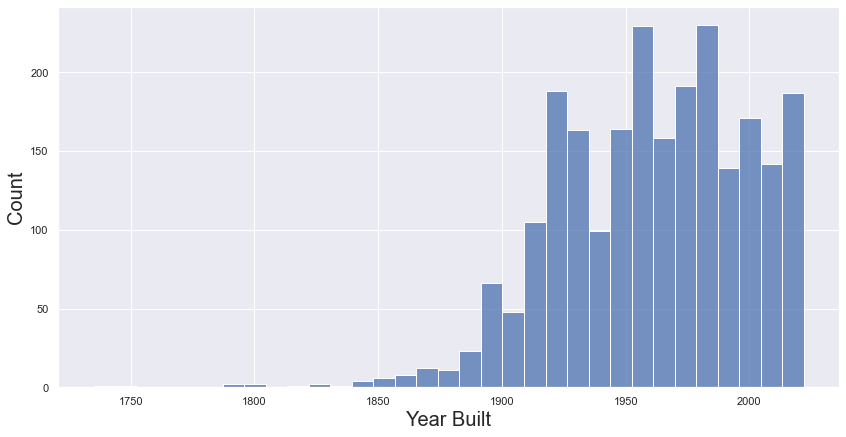

In [49]:
yearhist = sns.histplot(data = yeardrop, x = 'yearBuilt')
yearhist.set_xlabel('Year Built', fontsize = 20)
yearhist.set_ylabel('Count', fontsize = 20);